# Poisson Equation (Steady-State Diffusive Equation)

The Poisson is partial differential equation employed to represent problems as the pressure distribution over steady-state in space. It is characterized by a steady-state version of the difusive equation, i.e, the parameter is independent of time. The partial differential equation is given by 

$$
\partial_{\alpha}\left( \nu \partial_{\alpha}p \right) = 0
$$(poisson-eq-lb)

where $p$ is the pressure and $\nu$ diffusive control paremeter.

## Numerical Discretization

```{figure} mesh-1-diffusive-steady.svg
---
scale: 250%
align: center
name: mesh-1-diffusive-steady
---
1D regular grid example for diffusive equation.
```

### FDM Discretization

Discretizing the Eq. {eq}`df-eq-lb` through finite diference method, we have for forward time and central space (FTCS) discretizations:

$$
\partial_{\alpha}\left( \nu \partial_{\alpha}p \right) = \nu\frac{ p(x - \Delta_{x},t) -2p(x,t) + p(x + \Delta_{x},t) }{\Delta_{x}^{2}} =0,
$$

for $\nu$ constant and isolating the term $u(x,t + \Delta_{t})$, we can describe the $p$ time evolution:

$$
p(x,t)   =  \frac{ p(x - \Delta_{x},t) + p(x + \Delta_{x},t) }{2} .
$$

### Lattice Boltzmann Equation

Describing the problem through the BGK lattice Boltzmann equation (BGK-LB) for the lattice D1Q3:

$$
f_i( x_{\alpha} + c_{i,\alpha} \delta t, t'+\delta t) = f_i(x_{\alpha}, t')  -\left( \frac{ f_{i} - f_{i}^{eq} }{ \tau } \right), 
$$(LB-Poisson-Eq)

the equilibrium distribution function is defined by

$$
f^{eq}_{i} = \left\{ \begin{array}{ll}
   \left(w_{0} - 1\right)\widehat{p}(x_{\alpha}, t')  & i=0 \\
   w_{i}\widehat{p}(x_{\alpha}, t')  & i\neq 0
\end{array} \right. ,
$$

where $\widehat{p}$ is a shifted pressure, shifted by a reference constant pressure $p_{0}$, i.e., $p=p_{0}+\widehat{p}$ (This assumption is necessary due to pressure by definition can not be negative, but negative pressure values can be found depending of initial simulation set). The equilibrium moments are given by 

$$
\displaystyle\sum_{i=0} f_{i}^{eq}=0, \quad \quad \frac{1}{1-w_{0}}\displaystyle\sum_{i=1} f_{i}^{eq} = \frac{1}{1-w_{0}} \displaystyle\sum_{i=1} f_{i}=\widehat{p}, \quad \quad  \displaystyle\sum_{i}f_{i}^{eq} c_{i,\alpha} =0 \quad \quad \textrm{and} \quad \quad  \displaystyle\sum_{i}f_{i}^{eq} c_{i,\alpha} c_{i,\beta} =c_{s}^{2} \widehat{p} \delta_{\alpha\beta} .
$$(moments-fi)

Through Chapman–Enskog analysis, it is demonstrated that the first-order non-equilibrium moment describes the pressure gradient and, consequently, the average velocity:

$$
m^{neq}_{\alpha} = \displaystyle\sum_{i} c_{i,\alpha}\left( f_i-f_i^{eq}\right)  = -(c_{s}^{2} \tau \delta_{t})\partial_{\alpha}\widehat{p} \quad \quad \textrm{and} \quad\quad \tau = \displaystyle\frac{\nu}{c_{s}^{2} \delta_{t}} +\frac{1}{2}.
$$

#### Lattice Direction Moments

In [1]:
import warnings
warnings.filterwarnings("ignore")
from pylab import *
from __future__ import division
from sympy import *
import numpy as np
from sympy import S, collect, expand, factor, Wild
from sympy import fraction, Rational, Symbol
from sympy import symbols, sqrt, Rational
import sympy as sp
from IPython.display import display, Math, Latex
#-------------------------------------------------Símbolos----------------------------------------------
omega, p, w = symbols('omega, \widehat{p}, w')
wi, cx, cy, cs = symbols('w_{i} c_{x} c_{y} c_{s}')
fi, f0, f1, f2, f3, f4, f5, f6, f7, f8,  = symbols('f_{i} f_{0} f_{1} f_{2} f_{3} f_{4} f_{5} f_{6} f_{7} f_{8}')
#-------------------------------------------------Funções----------------------------------------------
feq = Function('feq')(wi, cx, cy)
fneq = Function('fneq')(wi, cx, cy)
f = Function('f')(fi)
#-------------------------------------------------Variáveis----------------------------------------------
fi=np.array([f1,f2,f3,f4,f5,f6,f7,f8])
w0=Rational(4,9);w1=Rational(1,9);w2=Rational(1,36)
wi=np.array([w0,w1,w1,w1,w1,w2,w2,w2,w2])
cx=np.array([0,1,0,-1,0,1,-1,-1,1])
cy=np.array([0,0,1,0,-1,1,1,-1,-1])
as2=Rational(3)
cs2=1/as2
#-------------------------------------------------Calc.Func------------------------------------------------
f= fi
feq=wi*p
feq[0]=(w0-1)*p

In [2]:
a00=simplify(sum(feq))
a0=simplify(sum(feq[1:]))/(1-w0)
ax=simplify(sum(feq*cx))
ay=simplify(sum(feq*cy))
axx=simplify(sum(feq*cx*cx))
axy=simplify(sum(feq*cx*cy))
ayy=simplify(sum(feq*cy*cy))

display(Math(r"\underbrace{\sum_{i=0} f_{i}^{eq} =\sum_{i=0} f_{i} }_{\textrm{Zero-Order Moment}} =" +  sp.latex(a00)
            +r",\quad \quad \underbrace{\frac{1}{1-w_{0}}\sum_{i=1} f_{i}^{eq} = \frac{1}{1-w_{0}}\sum_{i=1} f_{i} }_{\textrm{Zero-Order Moment}} =" +  sp.latex(a0)
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}c_{i,x} }_{\textrm{x-First-Order Moment}} =" +  sp.latex(ax)
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}c_{i,y} }_{\textrm{y-First-Order Moment}} =" +  sp.latex(ay)
            +r",\\ \quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}c_{i,x}c_{i,x} }_{\textrm{xx-Second-Order Moment}} =" +  sp.latex(axx)
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}c_{i,x}c_{i,y} }_{\textrm{xy-Second-Order Moment}} =" +  sp.latex(axy)
            +r" \quad \quad and \quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}c_{i,y}c_{i,y} }_{\textrm{yy-Second-Order Moment}} =" +  sp.latex(ayy)))

<IPython.core.display.Math object>

#### Chapmann-Enskog Analysis
```{toggle}
Applying the Chapmann-Enskog procedure to LB equation, we expand the term $f_{i}\left(\boldsymbol{x}+\boldsymbol{e}_i \Delta t, t+\Delta t\right)$ in a Taylor series to recover the derivative form of the equation, i.e.,

$$
f_{i}\left(x_{\alpha} + c_{i,\alpha} \Delta t, t+\Delta t\right)- f_{i}(\boldsymbol{x}, t)=\displaystyle\sum_{j=1}^{\infty}\frac{\Delta t^{j}}{j!}D_{t}^{j}f_{i}= -\left( \frac{ f_{i} - f_{i}^{eq} }{ \tau } \right).
$$(EqExp-Poisson-Eq)

Rescaling the dimensionless form of the Eq. {eq}`EqExp-Poisson-Eq` in terms of the Knudsen number ($Kn$), we have

$$
\displaystyle \sum^{\infty}_{j=1}  \frac{Kn^{(j-1)}}{j!} D_{t}^{j} f_{i} = - \frac{1}{Kn}\left( \frac{ f_{i} - f_{eq,i} }{ \tau } \right) \quad \quad \rightarrow \quad \quad \displaystyle \sum^{\infty}_{j=1}  \frac{Kn^{(j)}}{j!} D_{t}^{j} f_{i} = -  \frac{ f_{i} - f_{i}^{eq} }{ \tau },
$$

applying the asymptotic expansion in both the distribution function ($f_{i}=f_{i}^{(0)}+Kn f_{i}^{(1)} + Kn^{2} f_{i}^{(2)}+\cdots$) and time partial derivative ($\partial_{t}=\partial_{t}^{(0)}+ Kn \partial_{t}^{(1)}+Kn^{2} \partial_{t}^{(2)}+\cdots$), and separating the equation in orders up to the order $Kn^{2}$:

$$
\begin{array}{ll}
    (Kn^{(0)}):& f_{i}^{(0)}= f_{i}^{eq},\\
    (Kn^{(1)}):& \left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(0)}= - \displaystyle\frac{ f_{i}^{(1)} }{ \tau } , \\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(0)} + \displaystyle\frac{\left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)^{2} f_{i}^{(0)}}{2}= - \displaystyle\frac{ f_{i}^{(2)} }{ \tau },\\
    \textrm{ou}\\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)\displaystyle\left(1 - \frac{1}{2\tau}\right) f_{i}^{(1)} =  - \displaystyle\frac{ f_{i}^{(2)} }{ \tau } \quad\quad \rightarrow \quad\quad  f_{i}^{(1)}\textrm{ Formulation} \\
    \textrm{ou}\\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)^{2} \displaystyle\left(\frac{1}{2} - \tau\right) f_{i}^{(0)} =  - \displaystyle\frac{ f_{i}^{(2)} }{ \tau } \quad\quad \rightarrow  \quad\quad f_{i}^{(0)}\textrm{ Formulation}.
 \end{array}
$$(Chap-Kn-Poisson-Eq)

##### Zero-Order Moment Balance

To retrieve the balance equation, we sum the Eq. {eq}`Chap-Kn-Poisson-Eq` for $Kn^{(1)}$ and $Kn^{(2)}$ over $\sum_{i=0} $:

$$
\begin{array}{l}
(Kn^{(1)}): \displaystyle\sum_{i}\left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(0)}= \displaystyle\sum_{i} \left(- \displaystyle\frac{ f_{i}^{(1)} }{ \tau } \right),\\
(Kn^{(1)}): 0  =0,
\end{array}
$$

and

$$
\begin{array}{l}
(Kn^{(2)}): \displaystyle\sum_{i}\left( \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right)^{2} \displaystyle\left( \frac{1}{2}-\tau\right) f_{i}^{(0)} \right) =  \displaystyle\sum_{i}\left( - \displaystyle\frac{ f_{i}^{(2)} }{ \tau } \right), \\
(Kn^{(2)}): \left( \displaystyle\frac{1}{2}-\tau\right) \partial_{\alpha}\partial_{\beta} \left(c_{s}^{2} \widehat{p} \delta_{\alpha\beta} \right) =0. 
\end{array}
$$

or

$$
\begin{array}{l}
(Kn^{(2)}):& \displaystyle\sum_{i}\left[ \partial_{t}^{(1)} f_{i}^{(0)} - \left(1-\displaystyle\frac{1}{2\tau}\right)\left( \partial_{t}^{(0)} + c_{i,\alpha}\partial_{\alpha} \right) f_{i}^{(1)}   \right]=  \displaystyle\sum_{i}\left( - \displaystyle\frac{f_{i}^{(2)}}{\tau} \right), \nonumber \\
(Kn^{(2)}):& - \left(1-\displaystyle\frac{1}{2\tau}\right) m^{(1)}_{\alpha} = 0.
\end{array}
$$(Kn1-0-B0)

where $m^{(1)}_{\alpha}$ is the first-order moment of $f_{i}^{(1)}$ and $1/(1-w_{0})\sum_{i=1}f_{i}^{(j)}=0$ for $j\geq 1$ due to imposition of $\widehat{p}$ conservation. To compute the moment $m^{(1)}_{\alpha}$, we multiply Eq. {eq}`Chap-Kn-Poisson-Eq` by $c_{i,\alpha}$ and sum over all lattice directions:

$$
\begin{array}{l}
(Kn^{(1)}): \displaystyle\sum_{i}c_{i,\alpha}\left( \partial_{t}^{(0)} + e_{\beta,i}\partial_{\beta} \right)f_{i}^{(0)}= \displaystyle\sum_{i} c_{i,\alpha} \left( -\frac{f_{i}^{(1)}}{\tau}  \right),\\
(Kn^{(1)}): m^{(1)}_{\alpha} =-\tau \partial_{\beta}\left( c_{s}^{2} \widehat{p} \delta_{\alpha\beta}  \right).
\end{array}
$$(Kn0-B1)


By substituting Eq. {eq}`Kn0-B1` into Eq. {eq}`Kn1-0-B0`, we recover the Eq. {eq}`poisson-eq-lb`, where $\nu=c_{s}^{2}(\tau-1/2)$. In the regularized formulation of the lattice Boltzmann equation, the first-order correction is approximated as $f_{i}^{(1)}\approx (f_{i}-f_{i}^{(0)})=f_{i}^{neq}$, where higher-order Knudsen moments are filtered out and the collision term is reformulated in terms of $f_{i}^{neq}$.
```

#### Boundary Conditions

The boundary conditions for the lattice D2Q5 can be derived by solving a linear system of known moments, as illustrated in {doc}`appendix/bcs-D2Q5-poisson-equation`. For the D2Q5 lattice, the unknown distribution functions at each boundary are determined as summarized in Table below.


|    Boundaries   |   |                                      Layers                                     |   |                                                                                 |
|:---------------:|:-:|:-------------------------------------------------------------------------------:|:-:|:-------------------------------------------------------------------------------:|
|                 |   |                                      North                                      |   |                                      South                                      |
| Unknown $f_{i}$ |   |                $f_2=\widehat{p}_{n}(1-w_{0}) - (f_1+f_3+f_4)$               |   |                $f_4=\widehat{p}_{s}(1-w_{0}) - (f_1+f_2+f_3)$               |
|                 |   |                                       East                                      |   |                                       West                                      |
|                 |   |                $f_3=\widehat{p}_{e}(1-w_{0}) - (f_1+f_2+f_4)$               |   |                $f_1=\widehat{p}_{w}(1-w_{0}) - (f_2+f_3+f_4)$               |
|    Boundaries   |   |                                 Concave Corners                                 |   |                                                                                 |
|                 |   |                                    Northwest                                    |   |                                    Northeast                                    |
| Unknown $f_{i}$ |   | $f_1=-(\partial_{x}\widehat{p}+\partial_{y}\widehat{p})\tau c_{s}^{2}/2 - f_2 + \widehat{p}_{nw}/3$ |   |  $f_3=(\partial_{x}\widehat{p}-\partial_{y}\widehat{p})\tau c_{s}^{2}/2 - f_2 + \widehat{p}_{ne}/3$ |
|                 |   |  $f_4=(\partial_{x}\widehat{p}+\partial_{y}\widehat{p})\tau c_{s}^{2}/2 - f_3 + \widehat{p}_{nw}/3$ |   | $f_4=-(\partial_{x}\widehat{p}-\partial_{y}\widehat{p})\tau c_{s}^{2}/2 - f_1 + \widehat{p}_{ne}/3$ |
|                 |   |                                    Southwest                                    |   |                                    Southeast                                    |
|                 |   | $f_1=-(\partial_{x}\widehat{p}-\partial_{y}\widehat{p})\tau c_{s}^{2}/2 - f_4 + \widehat{p}_{sw}/3$ |   | $f_2=-(\partial_{x}\widehat{p}+\partial_{y}\widehat{p})\tau c_{s}^{2}/2 - f_1 + \widehat{p}_{se}/3$ |
|                 |   |  $f_2=(\partial_{x}\widehat{p}-\partial_{y}\widehat{p})\tau c_{s}^{2}/2 - f_3 + \widehat{p}_{sw}/3$ |   |  $f_3=(\partial_{x}\widehat{p}+\partial_{y}\widehat{p})\tau c_{s}^{2}/2 - f_4 + \widehat{p}_{se}/3$ |

## 1st Benchmark: Single sine mode on a finite rod (Dirichlet)

PDE: $(\phi_t = \partial_{x}(\nu\partial_{x}\phi), (0<x<L,\ t>0)$

BC: $(\phi(0,t)=\phi(L,t)=0)$

IC: $\phi(x,0)=\sin \left(\frac{\pi x}{L}\right)$

**Solution**

$$
\phi(x,t)=\sin\left(\frac{\pi x}{L}\right) \exp \left(-\nu \frac{\pi^2}{L^2} t\right).
$$

### FDM Solution:

In [23]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
L = 1.0             # Length of the domain
nu = 0.1/3.0        # Diffusion coefficient
t_end = 2.0         # Total simulation time
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx=21               #Square Domain Length
dx = L / (Nx-1)     # Spatial step size
c=1.0*2**(2)        # c=dx/dt
dt=dx/c             # Time step size
nt = int(t_end / dt)    # Time step number
print(f"dx={dx:.4e}\t dt={dt:.4e}\t nt={nt:d}") # Print values for check
#----------------------------------- Initialization - Numerical Arrays ----------------------------------------
Tf = np.zeros((Nx),dtype="float64")
x = np.linspace(0, Nx-1, Nx)
Tf = np.sin(np.pi * x / (Nx-1))
Tfp = np.zeros((Nx),dtype="float64")
AvTf = np.zeros((nt),dtype="float64")
#----------------------------------------- Maind Loop --------------------------------------------------------
for t in range(nt):
    Tfp[:] = ( np.roll(Tf[:], 1, axis=0) + np.roll(Tf[:], -1, axis=0) ) / 2.0
    Tf[:]=Tfp[:]
    Tf[0]= 0.0 
    Tf[Nx-1]= 0.0
    AvTf[t]=np.sum(Tf)/Nx;

dx=5.0000e-02	 dt=1.2500e-02	 nt=160


### LBM D1Q3 Solution With Steady-Scheme:

In [24]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
L = 1.0                # Length of the domain
nu = 0.1/3.0           # Diffusion coefficient
t_end = 2.0                # Total simulation time
#--------------------------------------- Lattice-Properties-D1Q3 ----------------------------------------------
cs=1.0/np.sqrt(3.0);
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int8")  
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx=21                   #Square Domain Length
dx = L / (Nx-1)         # Spatial step size
c=1.0*2**(2)            # c=dx/dt
dt=dx/c                 # Time step size
nt = int(t_end / dt)        # Time step number
nue=nu/(c*dx)       # Diffusion coefficient
tau=nue/cs**2+0.5   # Relaxation Time
print(f"dx={dx:.4e}\t dt={dt:.4e}\t nt={nt:d}") # Print values for check
print(f"nue={nue:.4f}\t tau={tau:.4f}")
#--------------------------------- Initialization - Numerical Arrays -----------------------------------------
T = np.zeros((Nx),dtype="float64")
x = np.linspace(0, Nx-1, Nx)
T = np.sin(np.pi * x / (Nx-1))
f = np.zeros((3,Nx),dtype="float64")
fp = np.zeros((3,Nx),dtype="float64")
AvT = np.zeros((nt),dtype="float64")
for k in range(0,3):
    fp[k,:]=w[k]*T[:]
#----------------------------------------- Maind Loop --------------------------------------------------------
for t in range(nt):
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(fp[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 0.0 - f[0,0]-f[2,0]
    f[2,Nx-1]= 0.0 - f[0,Nx-1]-f[1,Nx-1]
    #----------------------Macro------------------
    T[:] = (f[1,:]+f[2,:])/(1-w[0])
    AvT[t]=np.sum(T)/Nx;
    #--------------------Collision----------------
    fp[0,:]=f[0,:] - (f[0,:] - (w[0]-1)*T[:])/tau
    fp[1,:]=f[1,:] - (f[1,:] - w[1]*T[:])/tau
    fp[2,:]=f[2,:] - (f[2,:] - w[2]*T[:])/tau

dx=5.0000e-02	 dt=1.2500e-02	 nt=160
nue=0.1667	 tau=1.0000


### LBM D1Q2 Solution (Not Accept the Steady-Scheme):

In [33]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
L = 1.0                # Length of the domain
nu = 0.1/2.0           # Diffusion coefficient
t_end = 2.0            # Total simulation time
#--------------------------------------- Lattice-Properties-D1Q2 ----------------------------------------------
cs=1.0/np.sqrt(2.0);
w = np.array([1.0/2.0, 1.0/2.0],dtype="float64")
cx = np.array([1, -1],dtype="int8")  
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx=21                   # Square Domain Length
dx = L / (Nx-1)         # Spatial step size
c=1.0*2**(2)            # c=dx/dt
dt=dx/c                 # Time step size
nt = int(t_end / dt)        # Time step number
nue=nu/(c*dx)           # Diffusion coefficient
tau=nue/cs**2+0.5       # Relaxation Time
print(f"dx={dx:.4e}\t dt={dt:.4e}\t nt={nt:d}") # Print values for check
print(f"nue={nue:.4f}\t tau={tau:.4f}")
#--------------------------------- Initialization - Numerical Arrays -----------------------------------------
T2 = np.zeros((Nx),dtype="float64")
x = np.linspace(0, Nx-1, Nx)
T2 = np.sin(np.pi * x / (Nx-1))
f = np.zeros((2,Nx),dtype="float64")
fp = np.zeros((2,Nx),dtype="float64")
AvT2 = np.zeros((nt),dtype="float64")
fp[0,:]=w[0]*T2[:]
fp[1,:]=w[1]*T2[:]
#----------------------------------------- Maind Loop --------------------------------------------------------
for t in range(nt):
    #-----------------streaming-------------------
    f[0,:]=np.roll(fp[0,:], cx[0], axis=0)
    f[1,:]=np.roll(fp[1,:], cx[1], axis=0)
    #-----------------Boundaries-----------------------
    f[0,0]= 0.0 - f[1,0]
    f[1,Nx-1]= 0.0 - f[0,Nx-1]
    #----------------------Macro------------------
    T2[:] = f[0,:]+f[1,:]
    AvT2[t]=np.sum(T2)/Nx;
    #--------------------Collision----------------
    fp[0,:]=f[0,:] - (f[0,:] - w[0]*T2[:])/tau
    fp[1,:]=f[1,:] - (f[1,:] - w[1]*T2[:])/tau

dx=5.0000e-02	 dt=1.2500e-02	 nt=160
nue=0.2500	 tau=1.0000


### LBM D1Q3 Solution (Transient):

In [34]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
L = 1.0                # Length of the domain
nu = 0.1/3.0           # Diffusion coefficient
t = 2.0                # Total simulation time
#--------------------------------------- Lattice-Properties-D1Q3 ----------------------------------------------
cs=1.0/np.sqrt(3.0);
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int8")
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx=21                   # Square Domain Length
dx = L / (Nx-1)         # Spatial step size
c=1.0*2**(2)            # c=dx/dt
dt=dx/c                 # Time step size
nt = int(t / dt)        # Time step number
nue=nu/(c*dx)       # Diffusion coefficient
tau=nue/cs**2+0.5   # Relaxation Time
print(f"dx={dx:.4e}\t dt={dt:.4e}\t nt={nt:d}") # Print values for check
print(f"nue={nue:.4f}\t tau={tau:.4f}")
#--------------------------------- Initialization - Numerical Arrays -----------------------------------------
Tt = np.zeros((Nx),dtype="float64")
x = np.linspace(0, Nx-1, Nx)
Tt = np.sin(np.pi * x / (Nx-1))
f = np.zeros((3,Nx),dtype="float64")
fp = np.zeros((3,Nx),dtype="float64")
AvTt = np.zeros((nt),dtype="float64")
for k in range(0,3):
    fp[k,:]=w[k]*Tt[:]
#----------------------------------------- Maind Loop --------------------------------------------------------
for t in range(nt):
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(fp[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 0.0 - f[0,0]-f[2,0]
    f[2,Nx-1]= 0.0 - f[0,Nx-1]-f[1,Nx-1]
    #----------------------Macro------------------
    Tt[:]=f[0,:]+f[1,:]+f[2,:]
    AvTt[t]=np.sum(Tt)/Nx;
    #--------------------Collision----------------
    for k in range(0,3):
        fp[k,:]=f[k,:] - (f[k,:] - w[k]*Tt[:])/tau

dx=5.0000e-02	 dt=1.2500e-02	 nt=160
nue=0.1667	 tau=1.0000


### Numerical and Analytical Comparisson:

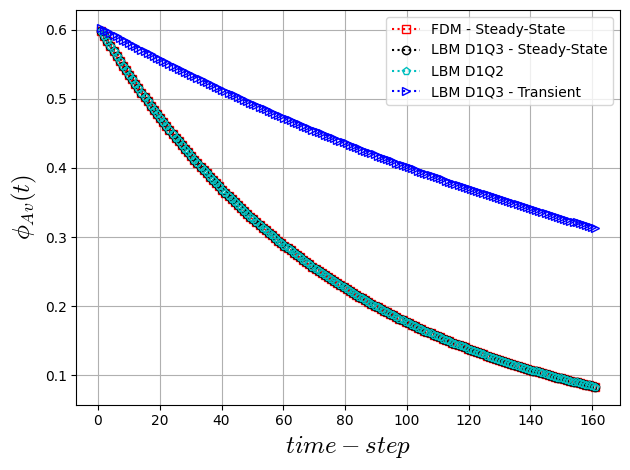

In [35]:
xl = np.linspace(1, nt+1, nt)
plt.plot(xl, AvTf, 'rs:' ,label='FDM - Steady-State',fillstyle='none')
plt.plot(xl, AvT, 'ko:' ,label='LBM D1Q3 - Steady-State',fillstyle='none')
plt.plot(xl, AvT2, 'cp:' ,label='LBM D1Q2',fillstyle='none')
plt.plot(xl, AvTt, 'b>:' ,label='LBM D1Q3 - Transient',fillstyle='none')
plt.xlabel(r"$time-step$",fontsize=18)
plt.ylabel(r"$\phi_{Av}(t)$",fontsize=18)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

## 2nd Benchmark: 2D Poisson Pressure Field

Analyzing the accuracy of Poisson equation solver, we apply it to a two-dimensional analytical case. The geometry is described by a square domain of length $L$ initialized with a constant dimensionless pressure $\widehat{p}(x,y,t=0)=0$. The boundary conditions of the geometry are given by

$$
\widehat{p}(x=0,y,t)=\displaystyle\frac{sinh\left(\pi(1-y)\right)}{sinh\left(\pi\right)}, \quad \quad \widehat{p}(x=L,y,t)= -\frac{sinh\left(\pi(1-y)\right)}{sinh\left(\pi\right)}, \quad \quad \widehat{p}(x,y=0,t)=cos(\pi x), \quad \quad \widehat{p}(x,y=L,t)=0.
$$

The pressure analytical solution for Eq. {eq}`poisson-eq-lb` pressure is given

$$
    \widehat{p}(x,y,t)=cos(\pi x) \displaystyle\frac{sinh\left(\pi(1-y)\right)}{sinh\left(\pi\right)}
$$

where $Dp_{0}$ is considered equal to 1, consequently, velocity values can be analytically obtained by the equation:

$$
    u_{x}=D\partial_{x}p= \pi sin(\pi x) \displaystyle\frac{sinh\left(\pi(1-y)\right)}{sinh\left(\pi\right)}, \quad \quad u_{y}=D\partial_{y}p= \pi cos(\pi x) \displaystyle\frac{cosh\left(\pi(1-y)\right)}{sinh\left(\pi\right)}.
$$

#### LBM D2Q5 Code

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#--------------------------------------- Parameters (physical units) ------------------------------------------
#------------Dimensionless-Data----------------
Lo = 1.0       # Length of the square domain
Do = 1.0       # Diffusion coefficient
t_end = 0.1    # Total simulation time
#--------------------------------------- Lattice-Properties-D2Q5 ----------------------------------------------
cs = 1.0 / np.sqrt(3.) #Lattice sound speed
w = np.array([2.0/6.0, 1.0/6.0, 1.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64") # Lattice weights
cx = np.array([0, 1, 0, -1,  0],dtype="int16")  # Lattice vectors
cy = np.array([0, 0, 1,  0, -1],dtype="int16")  # Lattice vectors
#------------------------------------- Parameters (numerical units) -------------------------------------------
Nx=201 #Square Domain Length
Ny=Nx
dx = Lo/(Nx-1);
rel = 2.0**9.21 *2**(1);
dt = dx / rel;
D = dt * Do / (dx * dx); 
tau = (D / (cs * cs)) + (1. / 2.); 
mstep= int(t_end / dt)    # Time step number
print(f"dx={dx:.4e}\t dt={dt:.4e}\t mstep={mstep:d}") # Print values for check
print(f"D={D:.4f}\t tau={tau:.4f}")

dx=5.0000e-03	 dt=4.2214e-06	 mstep=23688
D=0.1689	 tau=1.0066


In [4]:
#--------------------------------- Initialization - Initial Condition -------------------------------------
x=np.linspace(0.0,Lo,Nx) #x-array Length
y=np.linspace(0.0,Lo,Ny) #y-array Length
p=np.zeros((Nx,Ny),dtype="float64") #Allocating Pressure Field
# ------------------------North-Boundary---------------------------------
p[:,Ny-1]=0 #North Boundary
dxpn=np.zeros((Nx),dtype="float64") #Allocating Pressure Field
dxpn[:]=0*dx # dxp North Boundary (To be used in Corner BC)
# ------------------------South-Boundary---------------------------------
p[:,0]=np.cos(np.pi*x[:]) #Pressure South Boundary
dxps=np.zeros((Nx),dtype="float64") #Allocating Grad-Pressure
dxps[:]=-np.pi*np.sin(np.pi*x[:])*dx # dxp South Boundary (To be used in Corner BC)
# ------------------------West-Boundary---------------------------------
p[0,:]=np.sinh(np.pi*(1-y[:]))/np.sinh(np.pi) #West Boundary
dypw=np.zeros((Ny),dtype="float64") #Allocating Grad-Pressure
dypw[:]=-np.pi*np.cosh(np.pi*(1-y[:]))/np.sinh(np.pi)*dx # dyp West Boundary (To be used in Corner BC)
# ------------------------East-Boundary---------------------------------
p[Nx-1,:]=-np.sinh(np.pi*(1-y[:]))/np.sinh(np.pi) #East Boundary
dype=np.zeros((Ny),dtype="float64") #Allocating Grad-Pressure
dype[:]=np.pi*np.cosh(np.pi*(1-y[:]))/np.sinh(np.pi)*dx # dyp East Boundary (To be used in Corner BC)
#----------------------------- Initialization - Distribution Function --------------------------------------
f=np.zeros((5,Nx,Ny),dtype="float64") #Allocating Distribution Function
fp=np.zeros((5,Nx,Ny),dtype="float64") #Allocating Post-Colisional Distribution Function
f[0,:,:]=(w[0]-1.0)*p[:,:]
for k in range(1,5):
    fp[k,:,:]=w[k]*p[:,:]

In [5]:
import time
start=time.time()
for kk in range(0,mstep):
    #*******Streaming********
    for k in range(0,5):
        f[k,:,:]=np.roll(np.roll(fp[k,:,:], cx[k], axis=0), cy[k], axis=1)
    #************Boundary-Conditions**********
    f[4,1:-1,Ny-1]=-(f[1,1:-1,Ny-1]+f[2,1:-1,Ny-1]+f[3,1:-1,Ny-1]) #North
    f[2,1:-1,0]=np.cos(np.pi*x[1:-1])*(1.0-w[0])-(f[1,1:-1,0]+f[3,1:-1,0]+f[4,1:-1,0]) #South
    f[1,0,1:-1]=np.sinh(np.pi*(1-y[1:-1]))/np.sinh(np.pi)*(1.0-w[0])-(f[2,0,1:-1]+f[3,0,1:-1]+f[4,0,1:-1]) #West
    f[3,Nx-1,1:-1]=-np.sinh(np.pi*(1-y[1:-1]))/np.sinh(np.pi)*(1.0-w[0])-(f[1,Nx-1,1:-1]+f[2,Nx-1,1:-1]+f[4,Nx-1,1:-1]) #East
    #************Corner-Boundaries**********
    #----------------NorthWest----------------------
    f[1,0,Ny-1]=-(dxpn[0]+dypw[Ny-1])*tau*cs**2/2 -f[2,0,Ny-1]
    f[4,0,Ny-1]=(dxpn[0]+dypw[Ny-1])*tau*cs**2/2 -f[3,0,Ny-1]
    #----------------NorthEast----------------------
    f[3,Nx-1,Ny-1]=(dxpn[Nx-1]-dype[Ny-1])*tau*cs**2/2 -f[2,Nx-1,Ny-1]
    f[4,Nx-1,Ny-1]=-(dxpn[Nx-1]-dype[Ny-1])*tau*cs**2/2 -f[1,Nx-1,Ny-1]
    #----------------SouthWest----------------------
    f[1,0,0]=-(dxps[0]-dypw[0])*tau*cs**2/2 -f[4,0,0] +np.cos(np.pi*x[0])/3.0
    f[2,0,0]=(dxps[0]-dypw[0])*tau*cs**2/2 -f[3,0,0] +np.cos(np.pi*x[0])/3.0
    #----------------SouthEast----------------------
    f[2,Nx-1,0]=-(dxps[Nx-1]+dype[0])*tau*cs**2/2 -f[1,Nx-1,0] +np.cos(np.pi*x[Nx-1])/3.0
    f[3,Nx-1,0]=(dxps[Nx-1]+dype[0])*tau*cs**2/2 -f[4,Nx-1,0] +np.cos(np.pi*x[Nx-1])/3.0
    #***********Macro********
    p=(f[1,:,:]+f[2,:,:]+f[3,:,:]+f[4,:,:])/(1.0-w[0])
    #*******Collision********
    fp[0,:,:]=f[0,:,:]-(f[0,:,:]-(w[0]-1.0)*p[:,:])/tau # Collision Lattice Index 0
    for k in range(1,5):
        fp[k,:,:]=f[k,:,:]-(f[k,:,:]-w[k]*p[:,:])/tau # Collision Lattice Index 1-4

end=time.time();
runtime = end-start;
nodes_updated = mstep*Nx*Ny;
speed = nodes_updated/(1e6*runtime);
print('runtime=',runtime)
print('Mlups=',speed)

runtime= 11.375726699829102
Mlups= 84.12815402943686


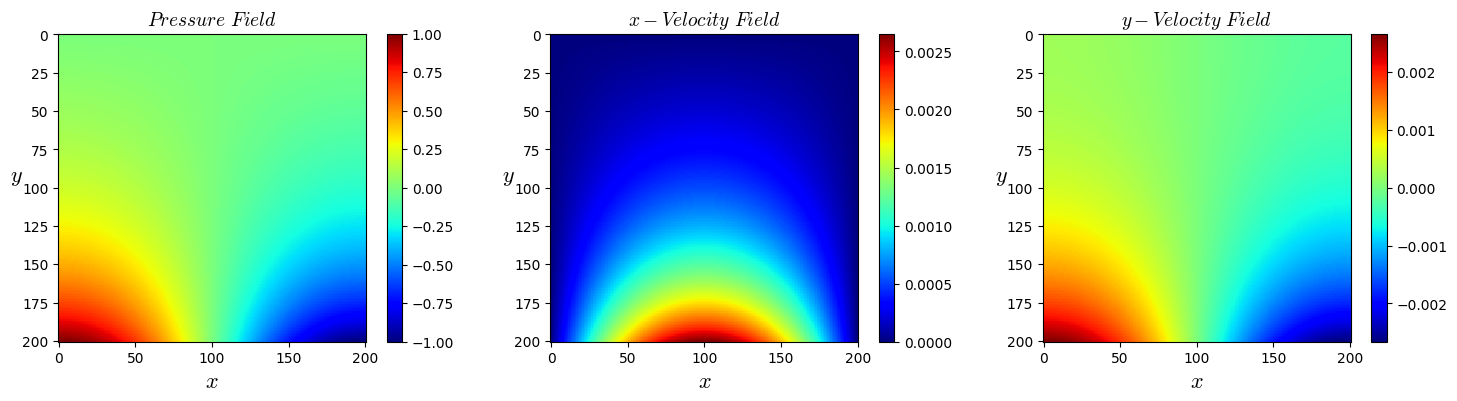

In [6]:
# ---------------------- Calculating Gradients ------------------------------
dpx=np.zeros((Nx,Ny),dtype="float64")
dpy=np.zeros((Nx,Ny),dtype="float64")
u=np.zeros((Nx,Ny),dtype="float64")
v=np.zeros((Nx,Ny),dtype="float64")
dxr=-np.einsum('i,ixy->xy', cx, f)/(cs**2*tau)
dyr=-np.einsum('i,ixy->xy', cy, f)/(cs**2*tau)
u=np.einsum('i,ixy->xy', cx, f)*(1.0-1.0/(2.0*tau))
v=np.einsum('i,ixy->xy', cy, f)*(1.0-1.0/(2.0*tau))
# -------------------------- Plot Results -----------------------------------
fig1, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(18,4))
# -----------------------PLot-1-------------------------------
img1=ax1.imshow(np.rot90(p),cmap='jet', interpolation='none')
fig1.colorbar(img1, ax=ax1)
ax1.set_xlabel('$x$',fontsize=16)
ax1.set_ylabel('$y$',fontsize=16,rotation=0)
ax1.set_title("$Pressure$ $Field$",fontsize=14)
# -----------------------PLot-2-------------------------------
img2=ax2.imshow(np.rot90(u),cmap='jet', interpolation='none')
fig1.colorbar(img2, ax=ax2)
ax2.set_xlabel('$x$',fontsize=16)
ax2.set_ylabel('$y$',fontsize=16,rotation=0)
ax2.set_title("$x-Velocity$ $Field$",fontsize=14)
# -----------------------PLot-3-------------------------------
img3=ax3.imshow(np.rot90(v),cmap='jet', interpolation='none')
fig1.colorbar(img3, ax=ax3)
ax3.set_xlabel('$x$',fontsize=16)
ax3.set_ylabel('$y$',fontsize=16,rotation=0)
ax3.set_title("$y-Velocity$ $Field$",fontsize=14)
fig1.show()

In [7]:
#----------------------------- Analytical-Slution --------------------------------------
yl, xl =np.meshgrid(x,y)
pana=np.cos(np.pi*xl)*np.sinh(np.pi*(1-yl))/np.sinh(np.pi)
dxp=-np.pi*np.sin(np.pi*xl)*np.sinh(np.pi*(1-yl))/np.sinh(np.pi)
dyp=-np.pi*np.cos(np.pi*xl)*np.cosh(np.pi*(1-yl))/np.sinh(np.pi)

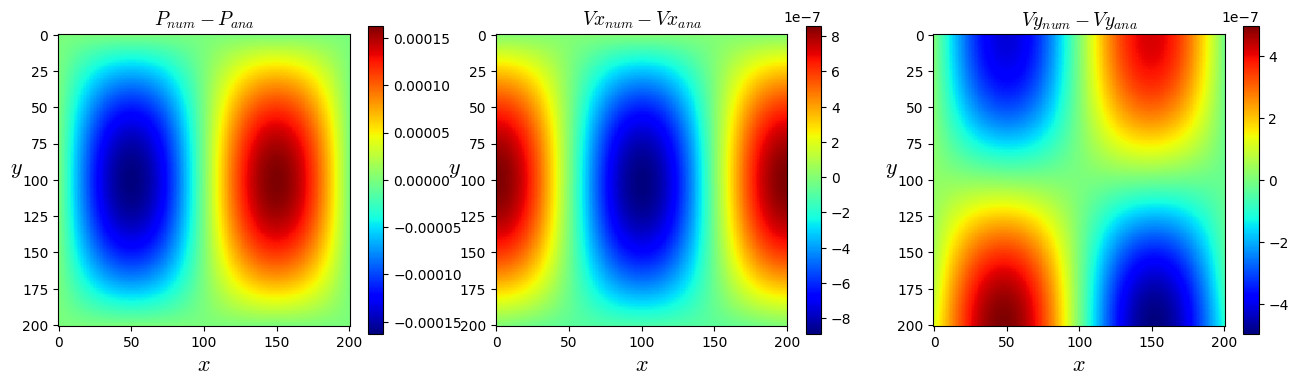

In [8]:
fig1, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(16,4))
# -----------------------PLot-1-------------------------------
img1=ax1.imshow(np.rot90(p-pana),cmap='jet', interpolation='none')
fig1.colorbar(img1, ax=ax1)
ax1.set_xlabel('$x$',fontsize=16)
ax1.set_ylabel('$y$',fontsize=16,rotation=0)
ax1.set_title("$P_{num}-P_{ana}$",fontsize=14)
# -----------------------PLot-2-------------------------------
img2=ax2.imshow(np.rot90(u+dxp*dt/dx),cmap='jet', interpolation='none')
fig1.colorbar(img2, ax=ax2)
ax2.set_xlabel('$x$',fontsize=16)
ax2.set_ylabel('$y$',fontsize=16,rotation=0)
ax2.set_title("$Vx_{num}-Vx_{ana}$",fontsize=14)
# -----------------------PLot-3-------------------------------
img3=ax3.imshow(np.rot90(v+dyp*dt/dx),cmap='jet', interpolation='none')
fig1.colorbar(img3, ax=ax3)
ax3.set_xlabel('$x$',fontsize=16)
ax3.set_ylabel('$y$',fontsize=16,rotation=0)
ax3.set_title("$Vy_{num}-Vy_{ana}$",fontsize=14)
fig1.show()

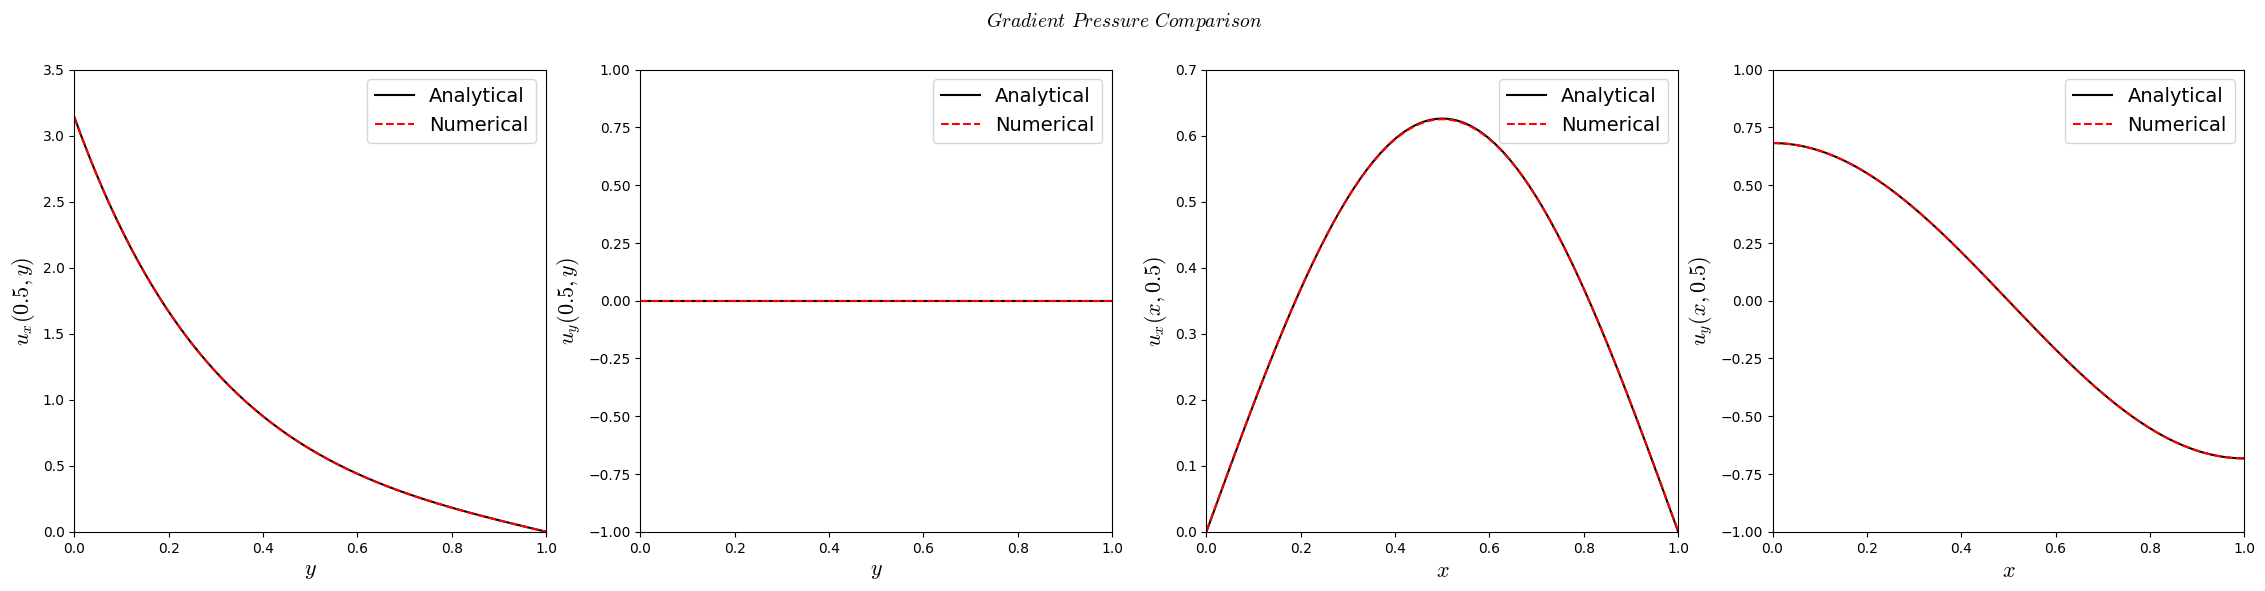

In [9]:
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(28,6))
fig1.suptitle(r"$Gradient$ $Pressure$ $Comparison$",fontsize=14)
# -----------------------PLot-1-------------------------------
ax1.plot(x,-dxp[int((Nx-1)/2),:],'k-',label='Analytical')
ax1.plot(x,u[int((Nx-1)/2),:]*dx/dt,'r--',label='Numerical')
ax1.set_xlim(0,1);ax1.set_ylim(0,3.5)
ax1.legend(fontsize=14)
ax1.set_xlabel('$y$',fontsize=16)
ax1.set_ylabel('$u_{x}(0.5,y)$',fontsize=16)
# -----------------------PLot-2-------------------------------
ax2.plot(y,-dyp[int((Nx-1)/2),:],'k-',label='Analytical')
ax2.plot(y,v[int((Nx-1)/2),:]*dx/dt,'r--',label='Numerical')
ax2.set_xlim(0,1);ax2.set_ylim(-1,1.)
ax2.legend(fontsize=14)
ax2.set_xlabel('$y$',fontsize=16)
ax2.set_ylabel('$u_{y}(0.5,y)$',fontsize=16)
# -----------------------PLot-3-------------------------------
ax3.plot(x,-dxp[:,int((Nx-1)/2)],'k-',label='Analytical')
ax3.plot(x,u[:,int((Nx-1)/2)]*dx/dt,'r--',label='Numerical')
ax3.set_xlim(0,1);ax3.set_ylim(0,0.7)
ax3.legend(fontsize=14)
ax3.set_xlabel('$x$',fontsize=16)
ax3.set_ylabel('$u_{x}(x,0.5)$',fontsize=16)
# -----------------------PLot-4-------------------------------
ax4.plot(y,-dyp[:,int((Nx-1)/2)],'k-',label='Analytical')
ax4.plot(y,v[:,int((Nx-1)/2)]*dx/dt,'r--',label='Numerical')
ax4.set_xlim(0,1);ax4.set_ylim(-1,1.)
ax4.legend(loc=1,fontsize=14)
ax4.set_xlabel('$x$',fontsize=16)
ax4.set_ylabel('$u_{y}(x,0.5)$',fontsize=16)
fig1.show()

In [10]:
Errop=np.sqrt(np.sum((p-pana)**2))/np.sqrt(np.sum((pana)**2))
print('ErroP=',Errop)
ErroDxp=np.sqrt(np.sum((dxr-dxp*dx)**2))/np.sqrt(np.sum((dxp*dx)**2))
print('ErroDxP=',ErroDxp)
ErroDyp=np.sqrt(np.sum((dyr-dyp*dx)**2))/np.sqrt(np.sum((dyp*dx)**2))
print('ErroDyP=',ErroDyp)
ErroU=np.sqrt(np.sum((u+dxp*dt/dx)**2))/np.sqrt(np.sum((dxp*dt/dx)**2))
print('ErroU=',ErroU)
ErroV=np.sqrt(np.sum((v+dyp*dt/dx)**2))/np.sqrt(np.sum((dyp*dt/dx)**2))
print('ErroV=',ErroV)

ErroP= 0.00028686139633696267
ErroDxP= 0.0005911290130148428
ErroDyP= 0.00030410178129063444
ErroU= 0.0005911290130149131
ErroV= 0.00030410178129050027


In [11]:
Ep0 = np.array([7.581804223832276e-05,1.9455755168783066e-05,3.516132010721964e-06])
Eu0 = np.array([0.0006494761036563891,0.00016159075773188218,4.0610389371128424e-05])
Ev0 = np.array([0.0006276179205283175,0.00015809795152452036,4.0377973496062506e-05])
Ep1 = np.array([0.00014879659187283224,3.820589700871858e-05,9.463298002459788e-06])
Eu1 = np.array([0.000970989709570425,0.00024123452788356743,6.011830955335574e-05])
Ev1 = np.array([0.0009217796134524976,0.00023270365330683272,5.8498500603119967e-05])
Malha=np.array([51,101,201])

In [13]:
print(Ep0)
TEp=np.polyfit(np.log(Malha), np.log(Ep0), 1)
print(TEp)

[7.58180422e-05 1.94557552e-05 3.51613201e-06]
[-2.23946394 -0.62518438]


In [14]:
print(Eu0)
TEu=np.polyfit(np.log(Malha), np.log(Eu0), 1)
print(TEu)

[6.49476104e-04 1.61590758e-04 4.06103894e-05]
[-2.02126162  0.6045687 ]


In [15]:
print(Ev0)
TEv=np.polyfit(np.log(Malha), np.log(Ev0), 1)
print(TEv)

[6.27617921e-04 1.58097952e-04 4.03779735e-05]
[-2.00048166  0.48802413]


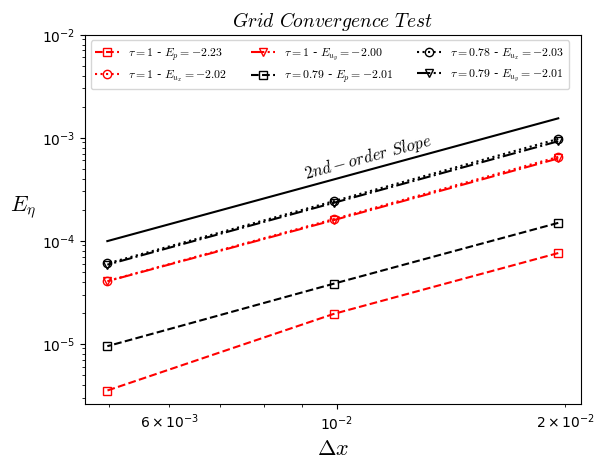

In [69]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
plt.title("$Grid$ $Convergence$ $Test$",fontsize=14)
plt.loglog(1/Malha,Ep0,'rs--',fillstyle='none', label='$\\tau=1$ - $E_{p}=-2.23$')
plt.loglog(1/Malha,Eu0,'ro:',fillstyle='none', label='$\\tau=1$ - $E_{u_{x}}=-2.02$')
plt.loglog(1/Malha,Ev0,'rv-.',fillstyle='none', label='$\\tau=1$ - $E_{u_{y}}=-2.00$')
plt.loglog(1/Malha,Ep1,'ks--',fillstyle='none', label='$\\tau=0.79$ - $E_{p}=-2.01$')
plt.loglog(1/Malha,Eu1,'ko:',fillstyle='none', label='$\\tau=0.79$ - $E_{u_{x}}=-2.03$')
plt.loglog(1/Malha,Ev1,'kv-.',fillstyle='none', label='$\\tau=0.79$ - $E_{u_{y}}=-2.01$')
plt.loglog(1/Malha,4.*1.0/(Malha**2),'k-',fillstyle='none')
plt.text(0.009, 0.0004, "$2nd-order$ $Slope$", rotation=15,fontsize=12)
plt.ylim(0,0.01)
plt.legend(loc=2,ncol=3,fontsize=8.5)
plt.ylabel('$E_{\eta}$',fontsize=16,rotation=0,horizontalalignment='right')
plt.xlabel('$\Delta x$',fontsize=16)
plt.show()
# plt.savefig('conv', dpi=300, bbox_inches='tight')